# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../Crop_Recommendation.csv')

In [3]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


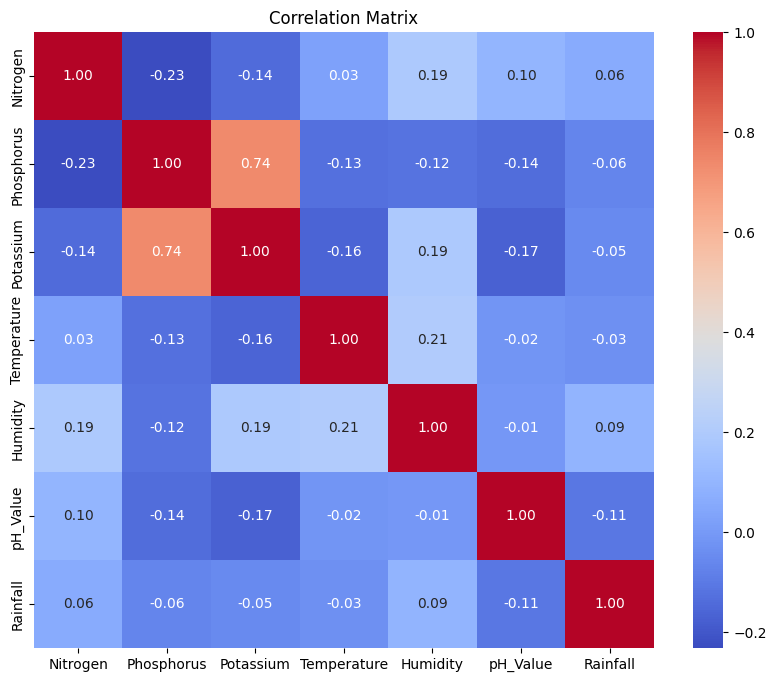

In [6]:
corr= df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

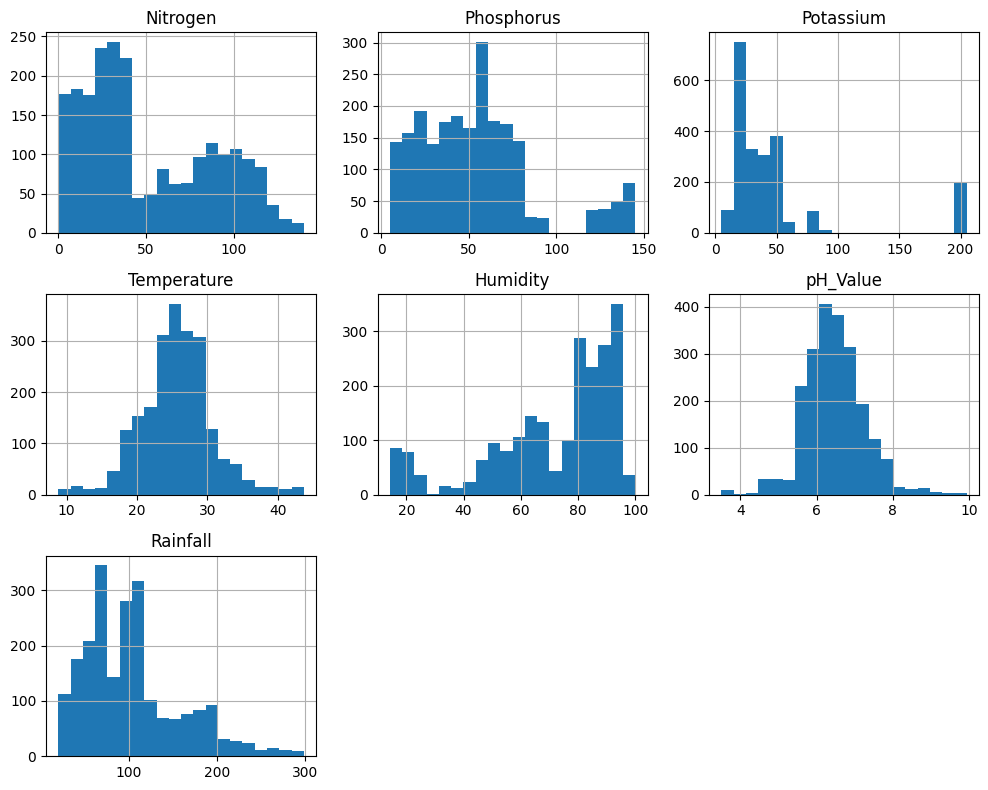

In [7]:
df.hist(figsize=(10, 8), bins=20)  

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Missing Value

In [8]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

Duplicate

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Cek Outlier

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_summary = {}

outlier_rows = pd.Series(False, index=df.index)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outlier_count

    outlier_rows |= (df[col] < lower) | (df[col] > upper)

outlier_df = pd.DataFrame.from_dict(
    outlier_summary, orient='index', columns=['jumlah_outlier']
).sort_values(by='jumlah_outlier', ascending=False)

print("Jumlah outlier per kolom:")
print(outlier_df)

print("\nJumlah baris yang mengandung outlier:", outlier_rows.sum())

df_clean = df[~outlier_rows].reset_index(drop=True)

print("\nJumlah data sebelum:", df.shape[0])
print("Jumlah data sesudah :", df_clean.shape[0])


Jumlah outlier per kolom:
             jumlah_outlier
Potassium               200
Phosphorus              138
Rainfall                100
Temperature              86
pH_Value                 57
Humidity                 30
Nitrogen                  0

Jumlah baris yang mengandung outlier: 432

Jumlah data sebelum: 2200
Jumlah data sesudah : 1768


Standarisasi

In [13]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,Rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,Rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,Rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,Rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,Rice


Binning

In [14]:
bin_cols = {
    'Temperature': {
        'q': 3,
        'labels': ['Rendah', 'Sedang', 'Tinggi']
    },
    'Humidity': {
        'q': 3,
        'labels': ['Kering', 'Normal', 'Lembap']
    },
    'Rainfall': {
        'q': 3,
        'labels': ['Rendah', 'Sedang', 'Tinggi']
    },
    'pH_Value': {
        'q': 3,
        'labels': ['Asam', 'Netral', 'Basa']
    }
}

for col, params in bin_cols.items():
    df[f'{col}_bin'] = pd.qcut(
        df[col],
        q=params['q'],
        labels=params['labels']
    )

df.head()


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Temperature_bin,Humidity_bin,Rainfall_bin,pH_Value_bin
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,Rice,Rendah,Normal,Tinggi,Netral
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,Rice,Rendah,Normal,Tinggi,Basa
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,Rice,Rendah,Normal,Tinggi,Basa
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,Rice,Sedang,Normal,Tinggi,Basa
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,Rice,Rendah,Normal,Tinggi,Basa


Encoding

In [15]:
encoder = OrdinalEncoder(
    categories=[
        ['Rendah', 'Sedang', 'Tinggi'],   # Temperature
        ['Kering', 'Normal', 'Lembap'],   # Humidity
        ['Rendah', 'Sedang', 'Tinggi'],   # Rainfall
        ['Asam', 'Netral', 'Basa']        # pH
    ]
)

bin_cols = ['Temperature_bin', 'Humidity_bin', 'Rainfall_bin', 'pH_Value_bin']

df[bin_cols] = encoder.fit_transform(df[bin_cols])
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Temperature_bin,Humidity_bin,Rainfall_bin,pH_Value_bin
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,Rice,0.0,1.0,2.0,1.0
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,Rice,0.0,1.0,2.0,2.0
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,Rice,0.0,1.0,2.0,2.0
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,Rice,1.0,1.0,2.0,2.0
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,Rice,0.0,1.0,2.0,2.0


In [16]:
df.to_csv('Crop_Recommendation_preprocessing.csv', index=False)